### Plot scattering angle of k+ as a function of its momentum

Theta values for kLong_p = 0.2 are: 
0     171.651747
1      99.992591
2     105.696058
3     174.981476
4     132.746364
5     106.390608
6      88.287517
7      75.020420
8      64.829969
9      56.717927
10     50.075755
11     44.511356
12     39.760705
13     35.639505
14     32.015204
15     28.790028
16     25.890275
17     23.259337
18     20.853016
19     18.636301
20     16.581096
21     14.664596
22     12.868096
23     11.176109
24      9.575704
25      8.055999
26      6.607769
27      5.223144
28      3.895369
29      2.618612
30      1.387814
31      0.198561
32      0.953012
33      2.070304
34      3.156319
35      4.213719
36      5.244872
37      6.251893
38      7.236673
39      8.200915
40      9.146147
41     10.073753
42     10.984985
43     11.880978
44     12.762767
45     13.631291
46     14.487413
47     15.331919
48     16.165532
49     16.988915
dtype: float64



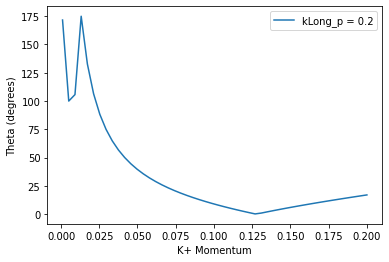

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

kLong_p_values = pd.Series([0.2]) # , 0.3, 0.4, 0.5, 0.6
kPlus_p = pd.Series(np.linspace(0.001, 0.20, 50))

n_m = 0.939  # neutron mass (recoil)
n_e = 0.938  # neutron energy (recoil)
kp_m = 0.4976  # k+ mass

# Define the function to calculate cosineTheta
def calculate_cosTheta(kLong_p, kPlus_p, n_m, n_e, kp_m):
    return np.cos((kLong_p**2 + kPlus_p**2 + n_m**2 - np.sqrt(kPlus_p**2 + kp_m**2) - n_e + np.sqrt(kp_m**2 + kPlus_p**2)) / (2 * kLong_p * kPlus_p))

# Loop through each value in kLong_p_values
for kLong_p in kLong_p_values:
    cosTheta = calculate_cosTheta(kLong_p, kPlus_p, n_m, n_e, kp_m)
    cosTheta = np.clip(cosineTheta, -1, 1)
    # print(f"CosineTheta values for kLong_p = {kLong_p} are: \n{cosineTheta}\n")
    theta = np.degrees(np.arccos(cosineTheta))  # Calculate theta in degrees
    print(f"Theta values for kLong_p = {kLong_p} are: \n{theta}\n")
    plt.plot(kPlus_p, theta, label=f'kLong_p = {kLong_p}')

plt.xlabel('K+ Momentum')
plt.ylabel('Theta (degrees)')  # Adjust the y-axis label
plt.legend()
plt.show()


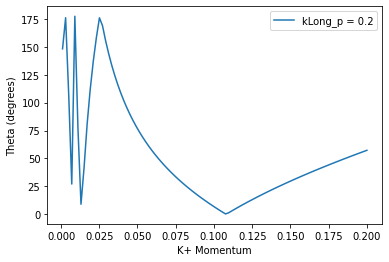

In [17]:
import matplotlib.pyplot as plt
import numpy as np

kLong_p_values = np.array([0.2]) #, 0.3, 0.4, 0.5, 0.6
kPlus_p = np.linspace(0.001, 0.20, 100)

KLm = 0.4976  # KL beam mass
Km = 0.4976  # K+ mass secondary
Nm = 0.939  # Neutron mass recoil
Pm = 0.939  # Proton mass target

# Initialize an empty array to store theta (in degrees) for each kLong_p value
theta_values_degrees = []

# Loop through each value in kLong_p_values
for kLong_p in kLong_p_values:
    KLe = np.sqrt(kLong_p ** 2 + KLm ** 2)  # KL beam energy
    Xe2 = (kPlus_p * kPlus_p + Km * Km)  # K+ energy**2
    Xe = np.sqrt(Xe2)  # K+ energy
    W = Pm + KLe  # W energy
    coter = (kLong_p ** 2 + Nm ** 2 - W ** 2 - Km ** 2)

    cosineTheta = np.cos((coter + 2 * W * Xe) / (2 * kLong_p * kPlus_p))
    
    cosineTheta = np.clip(cosineTheta, -1, 1)  # Clip values to be between -1 and 1
    
    theta_radians = np.arccos(cosineTheta)  # Calculate theta in radians
    theta_degrees = np.degrees(theta_radians)  # Convert theta to degrees
    theta_values_degrees.append(theta_degrees)
    
    plt.plot(kPlus_p, theta_degrees, label=f'kLong_p = {kLong_p}')

plt.xlabel('K+ Momentum')
plt.ylabel('Theta (degrees)')
plt.legend()
plt.show()
